In [40]:
import requests
import lxml.html
from bs4 import BeautifulSoup
import time

In [25]:
r = requests.get('https://www.baseball-reference.com/teams/SEA/2017-roster.shtml')

In [26]:
print(r)

<Response [200]>


In [27]:
def get_response(url):
    return requests.get(url)

In [28]:
html = r.text
new_html = html.split('\n', 1)[1]
# print(new_html)
root = lxml.html.fromstring(new_html)
soup = BeautifulSoup(html, "lxml")
print(len(soup.find_all("th", attrs={"class": "left "})))
players = soup.find_all("th", attrs={"class": "left "})
players[0].text

61


'Andrew Albers'

In [29]:
soup = BeautifulSoup(html, "html.parser")
tables = soup.select("table")
len(tables)
tables[1]['id']

'appearances'

In [30]:
teams_url = 'https://www.baseball-reference.com/teams/'
r = get_response(teams_url)
html = get_response(teams_url).text
soup = BeautifulSoup(html, 'lxml')
for table in soup.select("table"):
    if table['id'] == 'teams_active':
        active_teams_table = table
print(active_teams_table)


<table class="row_summable sortable stats_table" data-cols-to-freeze="0" id="teams_active"><caption>Active Franchises</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;This is a count of the rows from top to bottom.&lt;br&gt;It is recalculated following the sorting of a column." class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;This is a count of the rows from top to bottom.&lt;br&gt;It is recalculated following the sorting of a column." scope="col">Rk</th>
<th aria-label="Franchise" class=" poptip sort_default_asc left" data-stat="franchise_name" scope="col">Franchise</th>
<th aria-label="First Season" class=" poptip sort_default_asc center" data-stat="year_min" data-tip="First Year" scope="col">From</

In [69]:
teams = active_teams_table.find_all("td", attrs={'class':'left ', 'data-stat':'franchise_name'})
# active franchises
team_codes = []
for team in teams:
    team_name = team.text
    a = team.find("a")
    team_path = a['href']
    team_code = team_path.replace('/teams/', '').replace('/','')
    team_codes.append(team_code)
    sql = "INSERT INTO teams (name, code) VALUES ('{0}', '{1}');".format(team_name, team_code)
    print(sql)
    run_query(sql)
#     print(team_code, ": ", team_name)
    
#     print(team)

INSERT INTO teams (name, code) VALUES ('Arizona Diamondbacks', 'ARI');
INSERT INTO teams (name, code) VALUES ('Atlanta Braves', 'ATL');
INSERT INTO teams (name, code) VALUES ('Baltimore Orioles', 'BAL');
INSERT INTO teams (name, code) VALUES ('Boston Red Sox', 'BOS');
INSERT INTO teams (name, code) VALUES ('Chicago Cubs', 'CHC');
INSERT INTO teams (name, code) VALUES ('Chicago White Sox', 'CHW');
INSERT INTO teams (name, code) VALUES ('Cincinnati Reds', 'CIN');
INSERT INTO teams (name, code) VALUES ('Cleveland Indians', 'CLE');
INSERT INTO teams (name, code) VALUES ('Colorado Rockies', 'COL');
INSERT INTO teams (name, code) VALUES ('Detroit Tigers', 'DET');
INSERT INTO teams (name, code) VALUES ('Houston Astros', 'HOU');
INSERT INTO teams (name, code) VALUES ('Kansas City Royals', 'KCR');
INSERT INTO teams (name, code) VALUES ('Los Angeles Angels', 'ANA');
INSERT INTO teams (name, code) VALUES ('Los Angeles Dodgers', 'LAD');
INSERT INTO teams (name, code) VALUES ('Miami Marlins', 'FLA'

In [32]:
teams[0].text
len(teams)

30

In [33]:
print(team_codes)
# https://www.baseball-reference.com/teams/SEA/2017-roster.shtml
years = range(2008, 2018)

['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'HOU', 'KCR', 'ANA', 'LAD', 'FLA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SFG', 'SEA', 'STL', 'TBD', 'TEX', 'TOR', 'WSN']


In [34]:
list(years)
urls = []
for code in team_codes:
    for year in years:
        urls.append("https://www.baseball-reference.com/teams/{0}/{1}-roster.shtml".format(code, year))
        

In [35]:
urls

['https://www.baseball-reference.com/teams/ARI/2008-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2009-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2010-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2011-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2012-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2013-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2014-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2015-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2016-roster.shtml',
 'https://www.baseball-reference.com/teams/ARI/2017-roster.shtml',
 'https://www.baseball-reference.com/teams/ATL/2008-roster.shtml',
 'https://www.baseball-reference.com/teams/ATL/2009-roster.shtml',
 'https://www.baseball-reference.com/teams/ATL/2010-roster.shtml',
 'https://www.baseball-reference.com/teams/ATL/2011-roster.shtml',
 'https://www.baseball-reference.com/teams/ATL/2012-roster.sht

In [36]:
r = get_response(teams_url)
html = get_response(teams_url).text
soup = BeautifulSoup(html, 'lxml')
for table in soup.select("table"):
    if table['id'] == 'teams_active':
        active_teams_table = table

In [37]:
active_teams_table

<table class="row_summable sortable stats_table" data-cols-to-freeze="0" id="teams_active"><caption>Active Franchises</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;This is a count of the rows from top to bottom.&lt;br&gt;It is recalculated following the sorting of a column." class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;This is a count of the rows from top to bottom.&lt;br&gt;It is recalculated following the sorting of a column." scope="col">Rk</th>
<th aria-label="Franchise" class=" poptip sort_default_asc left" data-stat="franchise_name" scope="col">Franchise</th>
<th aria-label="First Season" class=" poptip sort_default_asc center" data-stat="year_min" data-tip="First Year" scope="col">From</

In [21]:
url = 'https://www.baseball-reference.com/teams/BAL/2013-roster.shtml'
html = get_response(url).text
soup = BeautifulSoup(html, 'lxml')
players = soup.find_all("th", attrs={"class": "left "})
print(players[0])

<th class="left " csk="Arrieta,Jake" data-append-csv="arrieja01" data-stat="player" scope="row"><a href="/players/a/arrieja01.shtml">Jake Arrieta</a></th>


In [39]:
len(urls)

300

In [46]:
last_time = time.time()

In [47]:
time.time() - last_time

10.701823949813843

In [50]:
list(enumerate(team_codes))

[(0, 'ARI'),
 (1, 'ATL'),
 (2, 'BAL'),
 (3, 'BOS'),
 (4, 'CHC'),
 (5, 'CHW'),
 (6, 'CIN'),
 (7, 'CLE'),
 (8, 'COL'),
 (9, 'DET'),
 (10, 'HOU'),
 (11, 'KCR'),
 (12, 'ANA'),
 (13, 'LAD'),
 (14, 'FLA'),
 (15, 'MIL'),
 (16, 'MIN'),
 (17, 'NYM'),
 (18, 'NYY'),
 (19, 'OAK'),
 (20, 'PHI'),
 (21, 'PIT'),
 (22, 'SDP'),
 (23, 'SFG'),
 (24, 'SEA'),
 (25, 'STL'),
 (26, 'TBD'),
 (27, 'TEX'),
 (28, 'TOR'),
 (29, 'WSN')]

In [74]:
teams_sql = 'select id, code from teams;'
teams = run_query(teams_sql)
list(enumerate(teams))
teams[0][0]

1

In [113]:
# ココほんちゃん
last_time = time.time()
teams_sql = 'select id, code from teams;'
teams = run_query(teams_sql)
print(teams)
list(enumerate(teams))
started_time = time.time()
print("started_at: ", started_time)

for index, team in enumerate(teams):
    team_id = team[0]
    team_code = team[1]
    print("now searching: ", team_code)
#     if index > 0:
#         break
    for year_index, year in enumerate(years):
#         if year_index > 0:
#             break
        url = "https://www.baseball-reference.com/teams/{0}/{1}-roster.shtml".format(team_code, year)
        passed_time = time.time() - last_time
        if passed_time < 1.0:
            time.sleep(1-passed_time)
        
        response = get_response(url)
        if response.status_code != 200:
            print("cannnot accessed: {0}".format(url))
            continue
        
        html = response.text
        last_time = time.time()
        soup = BeautifulSoup(html, 'lxml')

        players = soup.find_all("th", attrs={"class": "left "})
        for player in players:
            # TODO: ココ入れる
            player_name = player.text
#             print("===============")
#             print("team_id: ", team_id)
#             print("p_name : ", player_name)
#             print("year   : ", year)
            try:
                
                player_sql = "INSERT INTO players (name) SELECT * FROM (SELECT \"{0}\") as tmp WHERE NOT EXISTS (SELECT name FROM players WHERE name = \"{0}\");".format(player_name)
                run_query(player_sql)
                player_id_sql = "select id from players where name = \"{0}\" LIMIT 1".format(player_name)
                player_id = run_query(player_id_sql)
                team_player_sql = """
                INSERT INTO team_players (team_id, player_id, year) 
                SELECT * FROM (SELECT {0}, {1}, {2}) as tmp 
                WHERE NOT EXISTS (
                SELECT * FROM team_players 
                WHERE team_id = {0} and player_id = {1} and year = {2}) 
                LIMIT 1;
                """.format(team_id, player_id[0][0], year)
                run_query(team_player_sql)
            except Exception as e:
                print("error: ", e)
                print("error sql: ", player_sql)
                
            
ended_time = time.time()
time_passed = ended_time - started_time
print("ended_time:  ", ended_time)
print("time_passed: ", time_passed)

((1, 'ARI'), (2, 'ATL'), (3, 'BAL'), (4, 'BOS'), (5, 'CHC'), (6, 'CHW'), (7, 'CIN'), (8, 'CLE'), (9, 'COL'), (10, 'DET'), (11, 'HOU'), (12, 'KCR'), (13, 'ANA'), (14, 'LAD'), (15, 'FLA'), (16, 'MIL'), (17, 'MIN'), (18, 'NYM'), (19, 'NYY'), (20, 'OAK'), (21, 'PHI'), (22, 'PIT'), (23, 'SDP'), (24, 'SFG'), (25, 'SEA'), (26, 'STL'), (27, 'TBD'), (28, 'TEX'), (29, 'TOR'), (30, 'WSN'))
started_at:  1521604877.043767
now searching:  ARI
error:  (1060, "Duplicate column name '1'")
error sql:  INSERT INTO players (name) SELECT * FROM (SELECT "Emilio Bonifacio") as tmp WHERE NOT EXISTS (SELECT name FROM players WHERE name = "Emilio Bonifacio");
now searching:  ATL
now searching:  BAL
now searching:  BOS
now searching:  CHC
now searching:  CHW
now searching:  CIN
now searching:  CLE
now searching:  COL
now searching:  DET
now searching:  HOU
now searching:  KCR
now searching:  ANA
cannnot accessed: https://www.baseball-reference.com/teams/ANA/2008-roster.shtml
cannnot accessed: https://www.basebal

In [114]:
team_id = 1
correct_sql = """select * from team_players where team_id = {0}
group by year;""".format(team_id)

teams_num = run_query(correct_sql)

In [126]:
# 検算

for team in teams:
    team_id = team[0]
    correct_sql = """select count(*), year from team_players where team_id = {0}
    group by year ;""".format(team_id)
    teams_num = run_query(correct_sql)
    print("============")
    print("team: ", team[1], " ", team[0])
    print("len:  ", len(teams_num))
    correct = True
    for num in teams_num:
        if num[0] < 40:
            correct = False
    print("result: ", correct)

team:  ARI   1
len:   10
result:  True
team:  ATL   2
len:   10
result:  False
team:  BAL   3
len:   10
result:  True
team:  BOS   4
len:   10
result:  True
team:  CHC   5
len:   10
result:  True
team:  CHW   6
len:   10
result:  False
team:  CIN   7
len:   10
result:  False
team:  CLE   8
len:   10
result:  True
team:  COL   9
len:   10
result:  True
team:  DET   10
len:   10
result:  False
team:  HOU   11
len:   10
result:  True
team:  KCR   12
len:   10
result:  True
team:  ANA   13
len:   0
result:  True
team:  LAD   14
len:   10
result:  True
team:  FLA   15
len:   4
result:  True
team:  MIL   16
len:   10
result:  True
team:  MIN   17
len:   10
result:  True
team:  NYM   18
len:   10
result:  True
team:  NYY   19
len:   10
result:  True
team:  OAK   20
len:   10
result:  True
team:  PHI   21
len:   10
result:  True
team:  PIT   22
len:   10
result:  True
team:  SDP   23
len:   10
result:  True
team:  SFG   24
len:   10
result:  True
team:  SEA   25
len:   10
result:  False
team: 

In [128]:
# データとして使えるチームを抽出

verified_teams = []
for team in teams:
    team_id = team[0]
    correct_sql = """select count(*), year from team_players where team_id = {0}
    group by year ;""".format(team_id)
    teams_num = run_query(correct_sql)
    correct = True
    if len(teams_num) == 10:
        verified_teams.append(team)
print(verified_teams)

[(1, 'ARI'), (2, 'ATL'), (3, 'BAL'), (4, 'BOS'), (5, 'CHC'), (6, 'CHW'), (7, 'CIN'), (8, 'CLE'), (9, 'COL'), (10, 'DET'), (11, 'HOU'), (12, 'KCR'), (14, 'LAD'), (16, 'MIL'), (17, 'MIN'), (18, 'NYM'), (19, 'NYY'), (20, 'OAK'), (21, 'PHI'), (22, 'PIT'), (23, 'SDP'), (24, 'SFG'), (25, 'SEA'), (26, 'STL'), (28, 'TEX'), (29, 'TOR'), (30, 'WSN')]


In [132]:
import csv
someiterable = [['1','2','3'],['3','4','5']]
with open('some.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(someiterable)
    
with open('some.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['1', '2', '3']
['3', '4', '5']


In [ ]:
for team in verified_teams:

In [144]:
team = verified_teams[0]
query = """select player_id from team_players 
where team_id = {0}
and   year = 2010;
""".format(team[0])
# cohort_array = []
cohort_array = run_query(query)
print("aaaaaaaaaaaaaa")
print(list(cohort_array))

query = """select player_id from team_players 
where team_id = {0}
and   year = 2011;
""".format(team[0])
cohort_array2 = run_query(query)
print("bbbbbbbbbbbbb")
print(list(cohort_array2))

len(set(cohort_array) & set(cohort_array2))

aaaaaaaaaaaaaa
[(63,), (42,), (64,), (44,), (2,), (65,), (66,), (67,), (68,), (9,), (69,), (70,), (49,), (71,), (14,), (72,), (50,), (73,), (74,), (16,), (75,), (76,), (77,), (78,), (79,), (80,), (21,), (53,), (81,), (22,), (55,), (27,), (29,), (82,), (56,), (83,), (84,), (32,), (57,), (85,), (86,), (36,), (87,), (38,), (88,), (60,), (89,), (41,)]
bbbbbbbbbbbbb
[(42,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (68,), (9,), (100,), (69,), (101,), (70,), (102,), (49,), (13,), (72,), (103,), (104,), (74,), (76,), (77,), (78,), (105,), (106,), (107,), (108,), (109,), (21,), (110,), (111,), (112,), (23,), (113,), (55,), (114,), (115,), (116,), (117,), (56,), (85,), (118,), (38,), (60,), (61,), (41,), (119,)]


18

In [228]:
# team = verified_teams[0]


def get_cohort_streak(original_year, team):
    team_players_cohort_data = []
    for index, year in enumerate(range(original_year, 2018)):
        query = """select player_id from team_players 
    where team_id = {0}
    and   year = {1};
    """.format(team[0], year)
        players_ids = run_query(query)
        if index == 0:
            original_ids = set(players_ids)
            team_players_cohort_data.append(len(original_ids))
            continue
        exisiting_number = len(set(players_ids) & original_ids)
        team_players_cohort_data.append(exisiting_number)
    return team_players_cohort_data

# get_cohort_streak(2012)


# cohort_array = []
# team_code = 'SEA'

def get_teams_cohort_data(team):
    cohort_array = []
    for index, original_year in enumerate(range(2008,2018)):
        year_streak = [0 for i in range(0,index)]
        data = get_cohort_streak(original_year, team)
        year_data = year_streak + list(data)    
        cohort_array.append(year_data)
    return cohort_array
    

def write_csv(team_code, cohort_data):    
    import csv
    with open('data/{0}.csv'.format(team_code), 'w', newline='\n') as f:
        writer = csv.writer(f)
        writer.writerows(cohort_data)

In [229]:
for index, team in enumerate(verified_teams):
    cohort_data = get_teams_cohort_data(team)
    write_csv(team[1], cohort_data)

(1, 'ARI')
(2, 'ATL')
(3, 'BAL')
(4, 'BOS')
(5, 'CHC')
(6, 'CHW')
(7, 'CIN')
(8, 'CLE')
(9, 'COL')
(10, 'DET')
(11, 'HOU')
(12, 'KCR')
(14, 'LAD')
(16, 'MIL')
(17, 'MIN')
(18, 'NYM')
(19, 'NYY')
(20, 'OAK')
(21, 'PHI')
(22, 'PIT')
(23, 'SDP')
(24, 'SFG')
(25, 'SEA')
(26, 'STL')
(28, 'TEX')
(29, 'TOR')
(30, 'WSN')


In [65]:
import MySQLdb
DB_HOST = "localhost"
DB_PORT = 3306
DB_NAME = "bb_players"
DB_USER = "root"
DB_PASS = ""

def run_query(sql):
  connector = MySQLdb.connect(host=DB_HOST, port=DB_PORT, db=DB_NAME, user=DB_USER, passwd=DB_PASS, charset="utf8mb4")
  cursor = connector.cursor()
  cursor.execute(sql)
  result = cursor.fetchall()
  connector.commit()
  cursor.close()
  connector.close()
  return result


In [233]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

def get_data(file_path):
    total_data = np.genfromtxt(file_path, delimiter=',', skip_header=0)
    return total_data

def show_cohort_graph(file_path, file_name='somefig.png'):
    total_data  = get_data(file_path)
    number_data = total_data[:, 0:]
    left = np.arange(number_data.shape[0])
    for i in range(0, number_data.shape[0] - 1):
        if i == 0:
            bottom_line = np.zeros(number_data.shape[1])
        else:
            bottom_line = np.sum(number_data[np.arange(i - 1), :], axis = 0)
        upper_line = np.sum(number_data[np.arange(i), :], axis = 0)
        plt.fill_between(left, bottom_line, upper_line)
    plt.savefig(file_name)
    plt.show()

    

data/ARI.csv


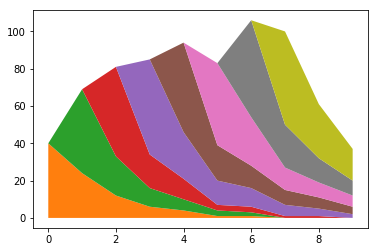

data/ATL.csv


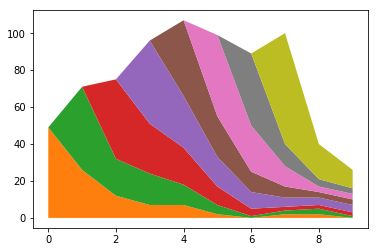

data/BAL.csv


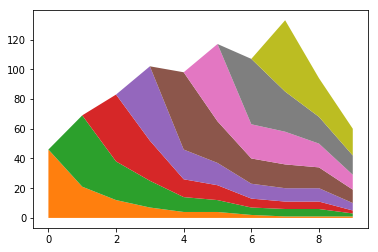

data/BOS.csv


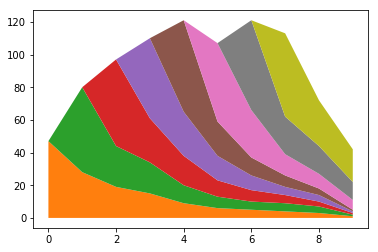

data/CHC.csv


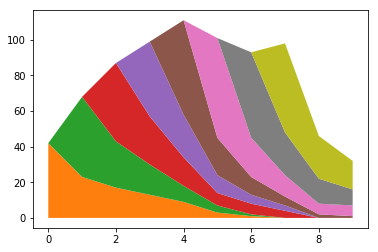

data/CHW.csv


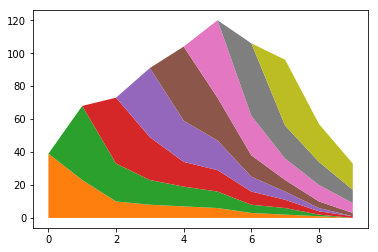

data/CIN.csv


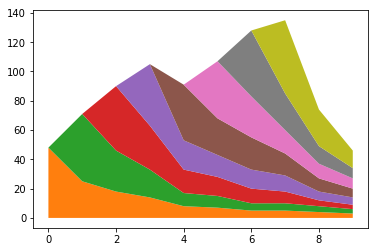

data/CLE.csv


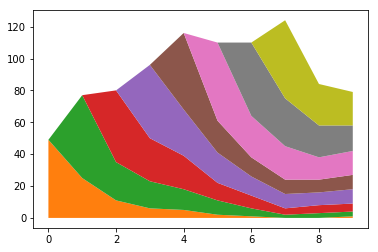

data/COL.csv


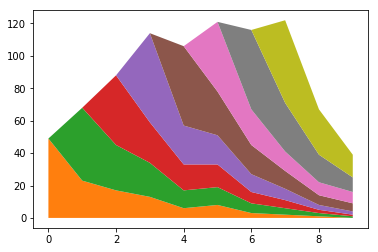

data/DET.csv


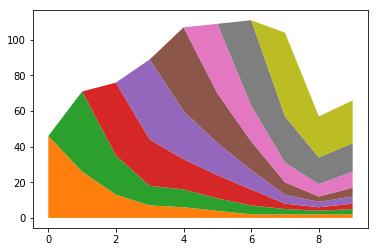

data/HOU.csv


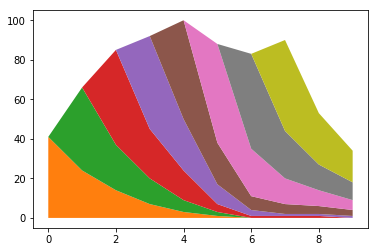

data/KCR.csv


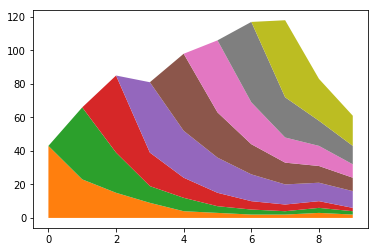

data/LAD.csv


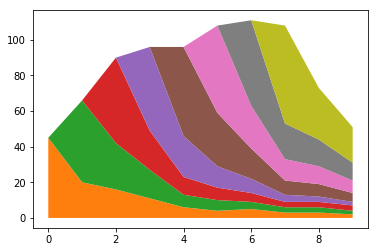

data/MIL.csv


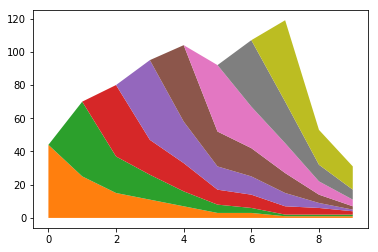

data/MIN.csv


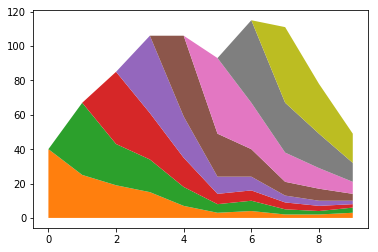

data/NYM.csv


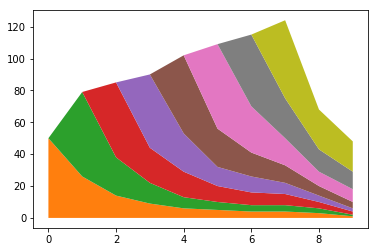

data/NYY.csv


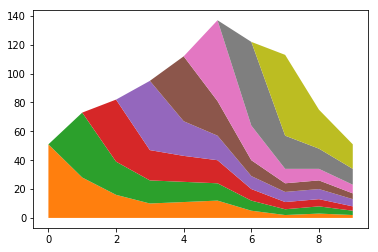

data/OAK.csv


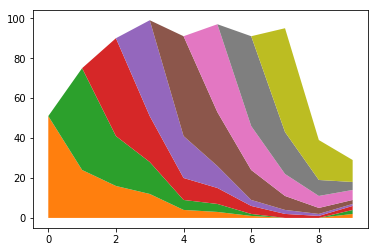

data/PHI.csv


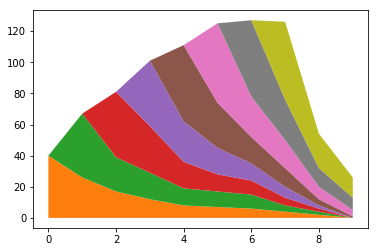

data/PIT.csv


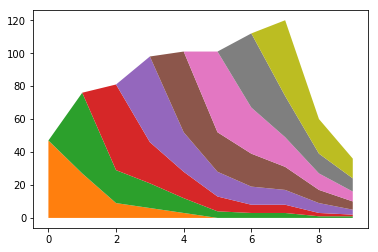

data/SDP.csv


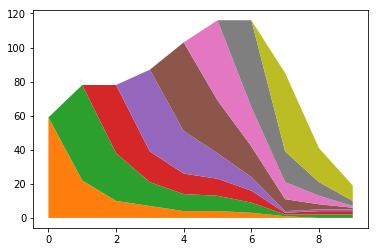

data/SFG.csv


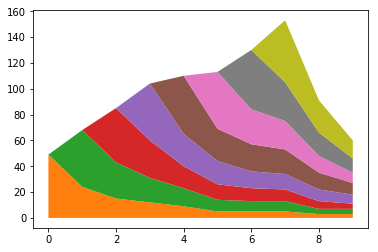

data/SEA.csv


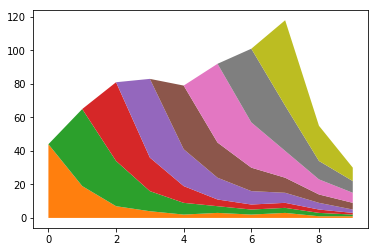

data/STL.csv


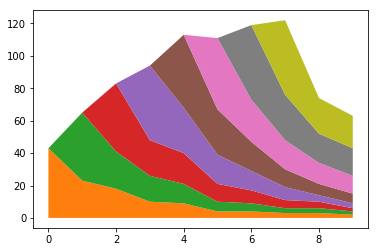

data/TEX.csv


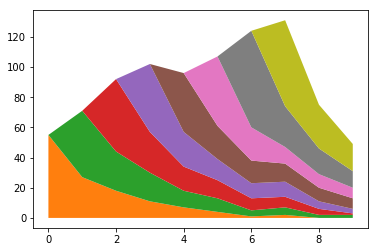

data/TOR.csv


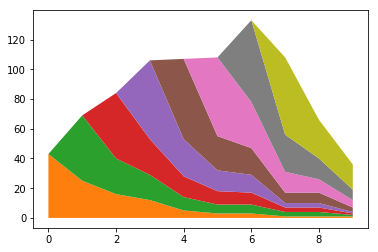

data/WSN.csv


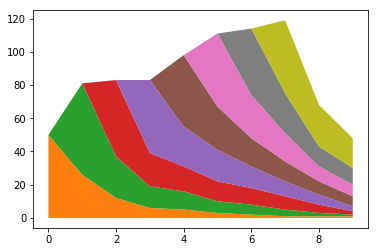

In [234]:
for team in verified_teams:
    file_path = "data/{0}.csv".format(team[1])
    print(file_path)
    show_cohort_graph(file_path, file_name="image/{0}.png".format(team[1]))

In [222]:
plt.savefig?